---
## Random Forest: Obesity

Data set: https://archive.ics.uci.edu/ml/datasets/Estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition+  
Article: https://www.sciencedirect.com/science/article/pii/S2352340919306985?via%3Dihub


    This paper contains data for the estimation of obesity levels in people from the countries of Mexico,Peru and Colombia, with ages between 14 and 61 and diverse eating habits and physical condition asmentioned by[1], data was collected using a web platform with a survey (seeTable 1) where anon-ymous users answered each question, then the information was processed obtaining 17 attributes and2111 records, after a balancing process described inFigs. 1 and 2. The attributes related with eatinghabits are: Frequent consumption of high caloric food (FAVC), Frequency of consumption of vegetables(FCVC), Number of main meals (NCP), Consumption of food between meals (CAEC), Consumption ofwater daily (CH20), and Consumption of alcohol (CALC). The attributes related with the physicalcondition are: Calories consumption monitoring (SCC), Physical activity frequency (FAF), Time usingtechnology devices (TUE), Transportation used (MTRANS), other variables obtained were: Gender, Age,Height and Weight. Finally, all data was labeled and the class variable NObesity was created with thevalues of: Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I,Obesity Type II and Obesity Type III, based on Equation(1)and information from WHO and MexicanNormativity. The data contains numerical data and continous data, so it can be used for analysis basedon algorithms of classification, prediction, segmentation and association. Data is available in CSVformat and ARFF format to be used with the Weka tool.

In [1]:
#create a dictionary for column names
col_dict = {
    'family_history_with_overweight':'Family History',
    'FAVC':'High Cal Food',
    'FCVC':'Vegetables',
    'NCP':'Number of Main Meals',
    'CAEC':'Food Between Meals',
    'CH2O':'Water',
    'CALC':'Alcohol',
    'SCC':'Calorie Counting',
    'FAF':'Physical Activity',
    'TUE':'Screen Time',
    'MTRANS':'Transportation Used',
    'SMOKE':'Smoking',
    'NObeyesdad':'Obesity'
}

In [2]:
import pandas as pd
import numpy as np

#import the dataset
df = pd.read_csv('./Obesity.csv')
df.rename(columns=col_dict, inplace = True)
print(df.columns)
                              

Index(['Gender', 'Age', 'Height', 'Weight', 'Family History', 'High Cal Food',
       'Vegetables', 'Number of Main Meals', 'Food Between Meals', 'Smoking',
       'Water', 'Calorie Counting', 'Physical Activity', 'Screen Time',
       'Alcohol', 'Transportation Used', 'Obesity'],
      dtype='object')


### Select Data Set Metrics and Classifier

In [3]:
#Create variables for metrics and classifier so we can use this on different data sets
#Set the data we want to drop as drop_cols
drop_cols = ['Height','Weight','Smoking','Calorie Counting']
df.drop(drop_cols, axis=1)

#Set our classifier
classifier = 'Obesity'

#Set the rest of the fields as attributes
drop_cols.append(classifier)
attributes = [column for column in list(df.columns) if column not in drop_cols]

print("Classifier:",classifier)
print("Attributes",attributes)

Classifier: Obesity
Attributes ['Gender', 'Age', 'Family History', 'High Cal Food', 'Vegetables', 'Number of Main Meals', 'Food Between Meals', 'Water', 'Physical Activity', 'Screen Time', 'Alcohol', 'Transportation Used']


In [4]:
df.describe()

,Age,Height,Weight,Vegetables,Number of Main Meals,Water,Physical Activity,Screen Time
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                2111 non-null   object 
 1   Age                   2111 non-null   float64
 2   Height                2111 non-null   float64
 3   Weight                2111 non-null   float64
 4   Family History        2111 non-null   object 
 5   High Cal Food         2111 non-null   object 
 6   Vegetables            2111 non-null   float64
 7   Number of Main Meals  2111 non-null   float64
 8   Food Between Meals    2111 non-null   object 
 9   Smoking               2111 non-null   object 
 10  Water                 2111 non-null   float64
 11  Calorie Counting      2111 non-null   object 
 12  Physical Activity     2111 non-null   float64
 13  Screen Time           2111 non-null   float64
 14  Alcohol               2111 non-null   object 
 15  Transportation Used  

### Category Fields
Let's convert our object fields into the category datatype.

In [6]:
#Convert object fields to category dtype

object_fields = list(df.select_dtypes('object').columns)

for field in object_fields:
    df[field] = df[field].astype('category')

In [7]:
#Convert the category field values into number values

from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

df.head()

,Gender,Age,Height,Weight,Family History,High Cal Food,Vegetables,Number of Main Meals,Food Between Meals,Smoking,Water,Calorie Counting,Physical Activity,Screen Time,Alcohol,Transportation Used,Obesity
0,0,404,295,245,1,0,170,477,2,0,549,0,0,840,3,3,1
1,0,404,28,173,1,0,809,477,2,1,1267,1,1189,0,2,3,1
2,1,701,1306,382,1,0,170,477,2,0,549,0,1071,840,1,3,1
3,1,1021,1306,643,0,0,809,477,2,0,549,0,1071,0,1,4,5
4,1,578,1202,692,0,0,170,0,2,0,549,0,0,0,2,3,6


## Split the data into training and test portions

In [8]:
from sklearn.model_selection import train_test_split


X = df[attributes]
y = df[classifier]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5) #training set size = 1-test_size

In [9]:
#show metrics

X_train.head() #first 5 rows

,Gender,Age,Family History,High Cal Food,Vegetables,Number of Main Meals,Food Between Meals,Water,Physical Activity,Screen Time,Alcohol,Transportation Used
2056,0,982,1,1,809,477,2,933,0,293,2,3
75,0,701,1,0,809,477,2,1267,1071,0,3,3
179,1,404,0,1,170,0,3,1267,589,0,2,3
1626,1,872,1,1,83,477,2,654,859,1,2,3
132,0,186,1,1,809,477,1,1267,589,1128,1,3


In [10]:
#show quality scores

y_train.head() #prints out first 5 rows

2056    4
75      0
179     5
1626    3
132     1
Name: Obesity, dtype: int64

## Training the Model

In [11]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier as rf

#Create a Gaussian Classifier with hyperparameters
clf=rf(n_estimators=1000, max_features=5, random_state=42)

#View Current Parameters
print('Parameters:\n')
for param, value in clf.get_params().items():
    print('    ',param,'=',str(value)+',')


#Train the model using the training sets
clf.fit(X_train, y_train)

y_pred=clf.predict(X_test)

Parameters:

     bootstrap = True,
     ccp_alpha = 0.0,
     class_weight = None,
     criterion = gini,
     max_depth = None,
     max_features = 5,
     max_leaf_nodes = None,
     max_samples = None,
     min_impurity_decrease = 0.0,
     min_samples_leaf = 1,
     min_samples_split = 2,
     min_weight_fraction_leaf = 0.0,
     n_estimators = 1000,
     n_jobs = None,
     oob_score = False,
     random_state = 42,
     verbose = 0,
     warm_start = False,


## Evaluate the Model

In [12]:
#Import Scikit-Learn metrics module for accuracy calculation
from sklearn import metrics

#Model Accuracy -- how often is the classifier correct?
print("Accuracy:",str(round(metrics.accuracy_score(y_test, y_pred)*100,2))+'%')

Accuracy: 81.63%


### What Drives the Model's Decision Making Abilities?

In [13]:
#Feature importance with Pandas
#Order by importance
feature_imp = pd.Series(clf.feature_importances_, index=attributes).sort_values(ascending=True)

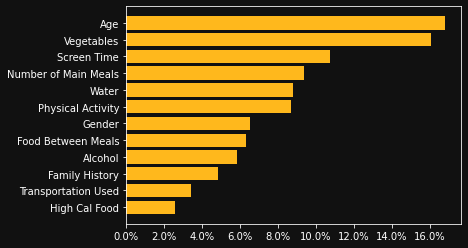

In [14]:
#Plot the data
from matplotlib import pyplot as plt, ticker as mtick

#format the graph
plt.style.use('dark_background')
fig, ax = plt.subplots()
fig.patch.set_facecolor('#111111')
ax.patch.set_facecolor('#111111')
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1))

#plot the data
ax.barh(feature_imp.index, feature_imp.values, color='#ffb81c')
plt.show()
